Дана функция f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x)

In [88]:
from sympy.abc import x
from sympy import solve, solveset, diff, plot, Interval, oo, sin, cos, nonlinsolve, linsolve
from sympy import minimum, maximum, evalf, pi, tan, atan, log, S, sqrt

In [89]:
y = (sin(x)/2 + cos(x)/2)**2 * sin(x)
y

(sin(x)/2 + cos(x)/2)**2*sin(x)

1. Определить корни

In [90]:
roots = solve(y, x)
roots

[0, -pi/4, 3*pi/4, pi]

In [91]:
solveset(y,x)

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

2 - 3. Найти интервалы, на которых функция возрастает/убывает

In [92]:
derivative = y.diff(x)
derivative

(-sin(x) + cos(x))*(sin(x)/2 + cos(x)/2)*sin(x) + (sin(x)/2 + cos(x)/2)**2*cos(x)

In [93]:
res_solve_derivative = solve(derivative, x)
for i in res_solve_derivative:
    print(round(i.evalf(),2), '\t', i)

-0.79 	 -pi/4
2.36 	 3*pi/4
-2.08 	 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)
2.87 	 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)
1.06 	 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)
-0.27 	 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)


In [94]:
if res_solve_derivative[-1] != pi:
    res_solve_derivative.append(pi)
if res_solve_derivative[0] != -pi:
    res_solve_derivative.insert(0, -pi)
for i in res_solve_derivative:
    print(round(i.evalf(),2), '\t', i)

-3.14 	 -pi
-0.79 	 -pi/4
2.36 	 3*pi/4
-2.08 	 -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)
2.87 	 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)
1.06 	 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)
-0.27 	 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)
3.14 	 pi


In [95]:
for i in range(len(res_solve_derivative) - 1):
    res = derivative.subs(x, (res_solve_derivative[i+1] + res_solve_derivative[i]/2.0))
    if res > 0:
        print(f'Функция возрастает на отрезке: {round(res_solve_derivative[i].evalf(),2)}, {round(res_solve_derivative[i+1].evalf(), 2)}')
    else:
        print(f'Функция убывает на отрезке: {round(res_solve_derivative[i].evalf(),2)}, {round(res_solve_derivative[i+1].evalf(), 2)}')

Функция убывает на отрезке: -3.14, -0.79
Функция убывает на отрезке: -0.79, 2.36
Функция возрастает на отрезке: 2.36, -2.08
Функция убывает на отрезке: -2.08, 2.87
Функция возрастает на отрезке: 2.87, 1.06
Функция возрастает на отрезке: 1.06, -0.27
Функция убывает на отрезке: -0.27, 3.14


4. Построить график

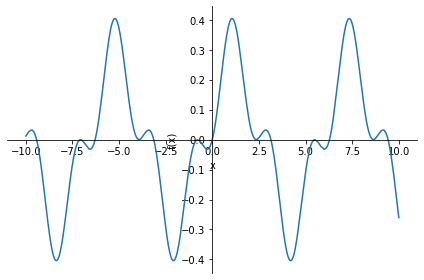

In [96]:
graff = plot(y)

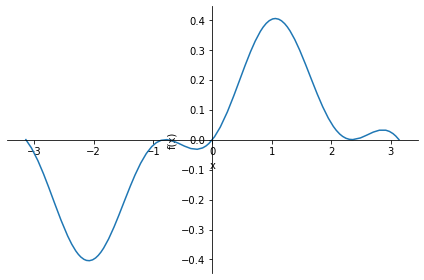

In [97]:
graff = plot(y, (x, -pi, pi))

5. Вычислить вершину

In [64]:
y_max = maximum(y, x, Interval(-pi, pi)).evalf()
y_min = minimum(y, x, Interval(-pi, pi)).evalf()
print(f'Максимум = {round(y_max, 3)}. Минимум = {round(y_min, 3)}')

Максимум = 0.404. Минимум = -0.404


In [98]:
for i in range(len(res_solve_derivative)):
    res = y.subs(x, res_solve_derivative[i])
    print(f'Вершина {i+1}: x = {round(res_solve_derivative[i].evalf(), 2)}, y = {round(res, 2)}')

Вершина 1: x = -3.14, y = 0
Вершина 2: x = -0.79, y = 0
Вершина 3: x = 2.36, y = 0
Вершина 4: x = -2.08, y = -0.40
Вершина 5: x = 2.87, y = 0.03
Вершина 6: x = 1.06, y = 0.40
Вершина 7: x = -0.27, y = -0.03
Вершина 8: x = 3.14, y = 0


6 - 7. Определить промежутки, на котором f > 0 / f < 0

In [99]:
if roots[-1] != pi:
    roots.append(pi)
if roots[0] != -pi:
    roots.insert(0, -pi)
roots

[-pi, 0, -pi/4, 3*pi/4, pi]

In [100]:
for i in range(len(roots) - 1):
    total = y.subs(x, (roots[i+1] + roots[i])/2.0)
    if total > 0:
        print(f'f > 0: ({roots[i]},{roots[i+1]})')
    else:
        print(f'f < 0: ({roots[i]},{roots[i+1]})')

f < 0: (-pi,0)
f < 0: (0,-pi/4)
f > 0: (-pi/4,3*pi/4)
f > 0: (3*pi/4,pi)
